In [1]:
# Import packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Pick ticker symbol of our stock
tkr_str = 'AAPL'
tkr = yf.Ticker(tkr_str)

In [3]:
# Get stock history for the last 30 days
tkr_history = tkr.history(period='30d')
tkr_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-30,289.18,293.73,287.57,293.01,45457600,0.0,0
2020-05-01,285.48,298.19,285.08,288.29,60154200,0.0,0
2020-05-04,288.39,292.90,285.55,292.37,33392000,0.0,0
2020-05-05,294.26,300.19,293.67,296.76,36937800,0.0,0
2020-05-06,299.65,302.42,298.06,299.82,35583400,0.0,0


In [4]:
# Reset the index so we can access the dates
tkr_history.reset_index(inplace=True)
tkr_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-30,289.18,293.73,287.57,293.01,45457600,0.0,0
1,2020-05-01,285.48,298.19,285.08,288.29,60154200,0.0,0
2,2020-05-04,288.39,292.90,285.55,292.37,33392000,0.0,0
3,2020-05-05,294.26,300.19,293.67,296.76,36937800,0.0,0
4,2020-05-06,299.65,302.42,298.06,299.82,35583400,0.0,0


In [24]:
# Check the data type of each column
tkr_history.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits             int64
dtype: object

In [5]:
# Calculate elapsed days
base_date = tkr_history['Date'][0]
tkr_history['day_num'] = tkr_history['Date'].map(lambda date:(date - base_date).days)
tkr_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_num
0,2020-04-30,289.18,293.73,287.57,293.01,45457600,0.0,0,0
1,2020-05-01,285.48,298.19,285.08,288.29,60154200,0.0,0,1
2,2020-05-04,288.39,292.90,285.55,292.37,33392000,0.0,0,4
3,2020-05-05,294.26,300.19,293.67,296.76,36937800,0.0,0,5
4,2020-05-06,299.65,302.42,298.06,299.82,35583400,0.0,0,6


In [6]:
# Function to draw candlestick
def draw_candlestick(axis, data, color_up, color_down):
    
    # Check if stock closed higher or not
    if data['Close'] > data['Open']:
        color = color_up
    else:
        color = color_down

    # Plot the candle wick
    axis.plot([data['day_num'], data['day_num']], [data['Low'], data['High']], linewidth=1.5, color='black', solid_capstyle='round', zorder=2)
    
    # Draw the candle body
    rect = mpl.patches.Rectangle((data['day_num'] - 0.25, data['Open']), 0.5, (data['Close'] - data['Open']), facecolor=color, edgecolor='black', linewidth=1.5, zorder=3)

    # Add candle body to the axis
    axis.add_patch(rect)
    
    # Return modified axis
    return axis

In [8]:
# Function to draw all candlesticks
def draw_all_candlesticks(axis, data, color_up='white', color_down='black'):
    for day in range(data.shape[0]):
        axis = draw_candlestick(axis, data.iloc[day], color_up, color_down)
    return axis

In [9]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18

mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

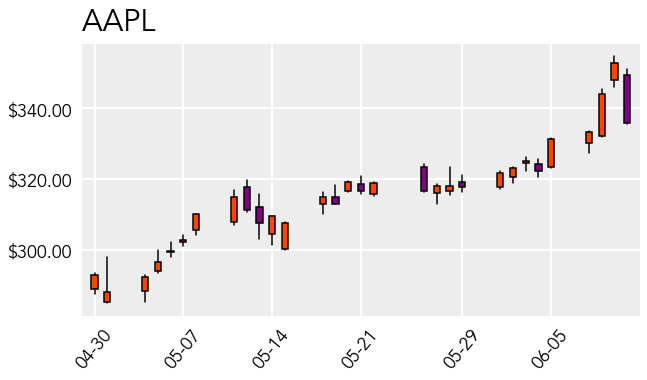

In [20]:
# Create figure and axes
fig = plt.figure(figsize=(10, 5), facecolor='white')
ax = fig.add_subplot(111)

# Colors for candlesticks
colors = ['#ff4500', '#800080']

# Grid lines
ax.grid(linestyle='-', linewidth=2, color='white', zorder=1)

# Draw candlesticks
ax = draw_all_candlesticks(ax, tkr_history, colors[0], colors[1])

# Set ticks to every 5th day
ax.set_xticks(list(tkr_history['day_num'])[::5])
ax.set_xticklabels(list(tkr_history['Date'].dt.strftime('%m-%d'))[::5])
plt.xticks(rotation=50)

# Add dollar signs
formatter = mpl.ticker.FormatStrFormatter('$%.2f')
ax.yaxis.set_major_formatter(formatter)

# Append ticker symbol
ax.text(0, 1.05, tkr_str, va='baseline', ha='left', size=30, transform=ax.transAxes)

# Set axis limits
ax.set_xlim(-1, tkr_history['day_num'].iloc[-1] + 1)

# Show plot
plt.show()